In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('flats_wroclaw_final.csv')

In [38]:
df.head()

,room_number,floor_number,floor,prod_year,flat_surface_m2,price_per_m2,price,district,building_type
0,2,7,4,2022,47.85,9592.0,459000.0,Krzyki,blok
1,4,9,8,2016,212.10,35361.0,7500000.0,Krzyki,blok
2,5,48,8,2012,227.00,23106.0,5245000.0,Stare Miasto,apartamentowiec
3,4,48,9,2012,176.50,27195.0,4800000.0,Stare Miasto,apartamentowiec
4,6,10,9,2021,179.14,20000.0,3582800.0,Krzyki,blok


<AxesSubplot:>

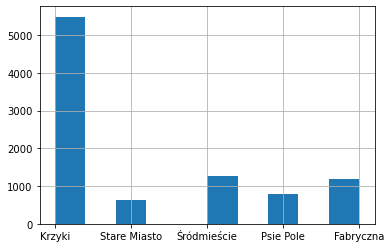

In [44]:
df.district.hist()

<AxesSubplot:>

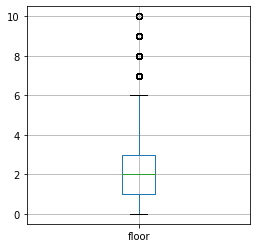

In [47]:
df.boxplot(column='floor',figsize=(4,4))

Text(0.5, 1.0, 'Correlation Heatmap')

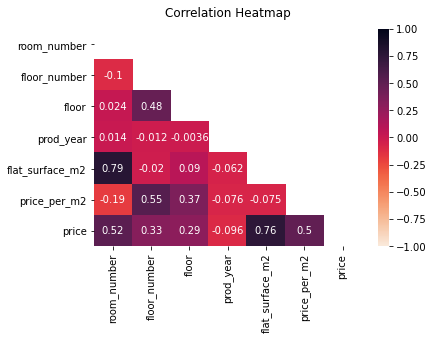

In [36]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
cmap = sns.cm.rocket_r
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap, mask=mask)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

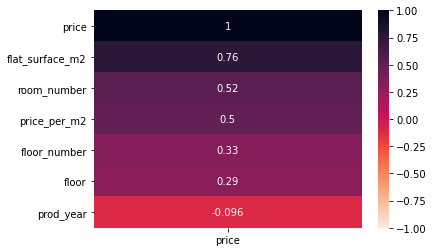

In [41]:
price_corr = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap=cmap)

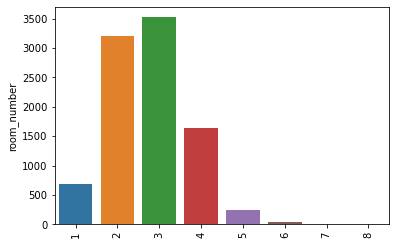

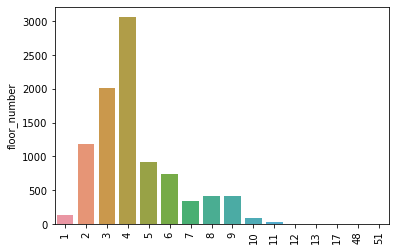

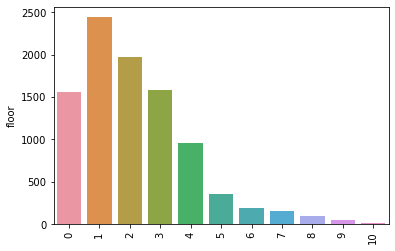

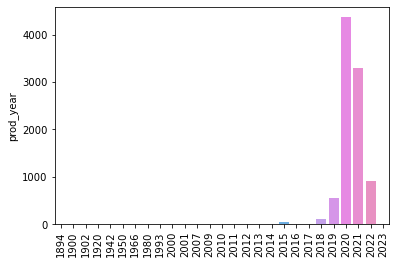

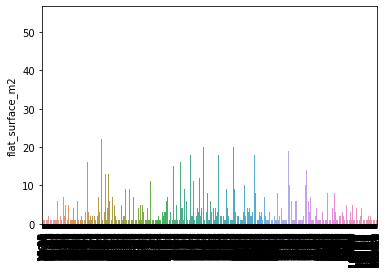

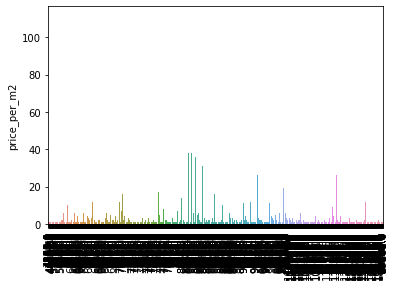

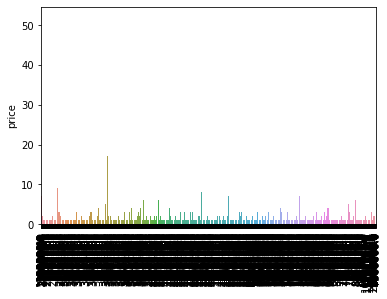

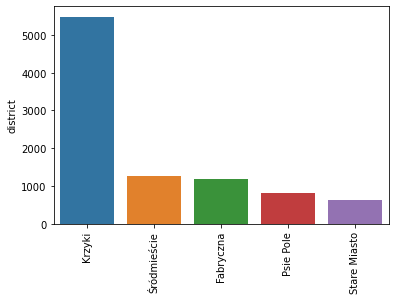

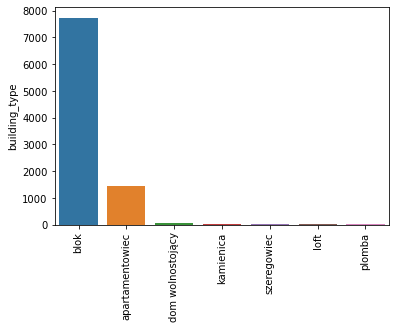

In [50]:
for i in df.columns:
    cat_num = df[i].value_counts()
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [86]:
df.columns

Index(['room_number', 'floor_number', 'floor', 'prod_year', 'flat_surface_m2',
       'price_per_m2', 'price', 'district', 'building_type'],
      dtype='object')

In [113]:
pd.pivot_table(df, values='flat_surface_m2', index=['district','building_type']).round(decimals=0)

flat_surface_m2
district     building_type                    
Fabryczna    apartamentowiec              59.0
             blok                         54.0
             dom wolnostojący             57.0
             kamienica                    59.0
             loft                         57.0
             szeregowiec                  67.0
Krzyki       apartamentowiec              66.0
             blok                         58.0
             dom wolnostojący             53.0
             szeregowiec                  74.0
Psie Pole    apartamentowiec              62.0
             blok                         55.0
             dom wolnostojący             50.0
             kamienica                    41.0
             szeregowiec                  51.0
Stare Miasto apartamentowiec              75.0
             blok                         58.0
             kamienica                    63.0
             loft                         94.0
             szeregowiec                  43.0
Śródmieście  apartamentowiec              62.0
             blok                         61.0
             dom wolnostojący             41.0
             kamienica                    81.0
             loft                         87.0
             plomba                       69.0